In [1]:
#This part is for importing libraries
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as sc
import os


In [2]:
file = 'SkyNet_r-process.h5'
hf = h5py.File(file,'r')
list(hf)

['A',
 'BindingEnergy',
 'Density',
 'Dt',
 'Entropy',
 'EtaE',
 'HeatingRate',
 'Temperature',
 'Time',
 'Y',
 'Ye',
 'Z']

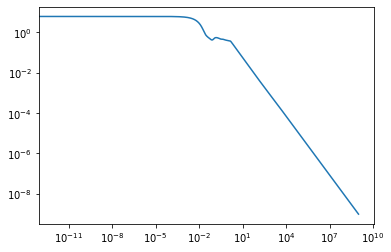

In [3]:
#This section defines temperature, time, and the extended parts of it.
#I did the autonomous calculations here by just finding the index where things become flat in loglog space
temperature = hf["Temperature"]
time = hf["Time"]
mod_temp = []
full_temp = []

for i in range(1,len(temperature)):
    if temperature[i-1] / temperature[i] ==1:
        index_cut = i-1
        break

linear = np.polyfit(np.log10(np.array(time[index_cut-300:index_cut])),np.log10(np.array(temperature[index_cut-300:index_cut])),1)
m = linear[0]

#m = (np.log10(temperature[1700]) - np.log10(temperature[1600])) / (np.log10(time[1700]) - np.log10(time[1600]))

for i in range(0,len(temperature)):
    if i < index_cut:
        mod_temp.append(np.log10(temperature[i]))
        full_temp.append(temperature[i])
    else:
        del_t = m*(np.log10(time[i]) - np.log10(time[i-1]))
        mod_temp.append(mod_temp[i-1]+del_t)
        full_temp.append(10**mod_temp[i])
        
plt.loglog(time,full_temp)

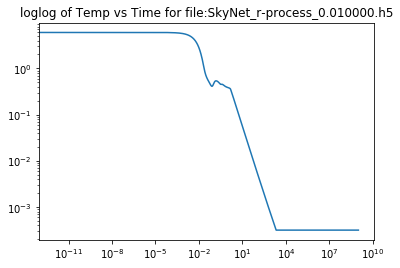

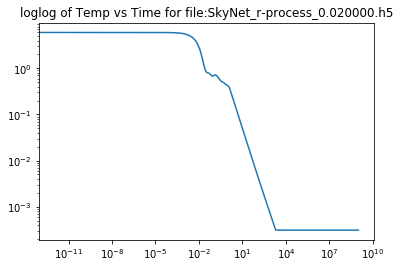

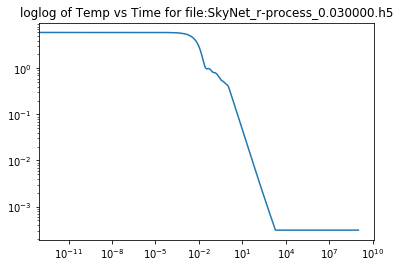

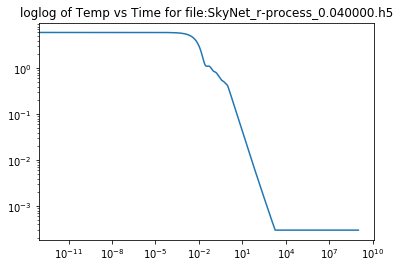

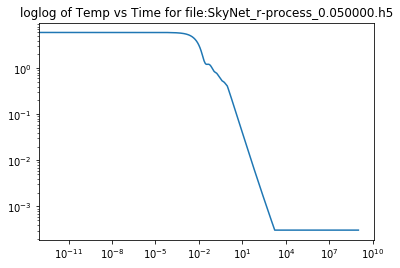

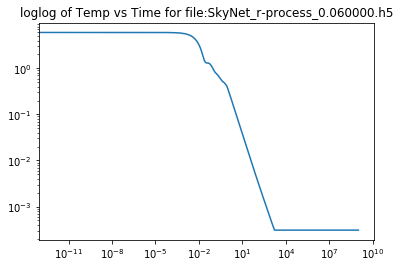

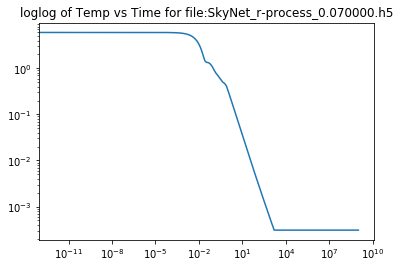

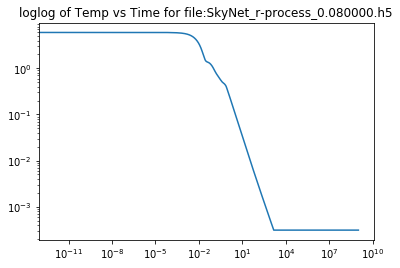

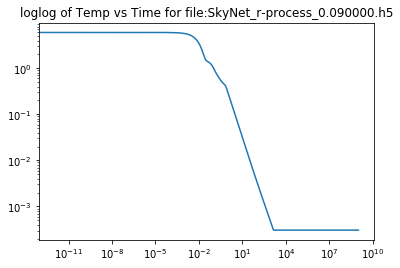

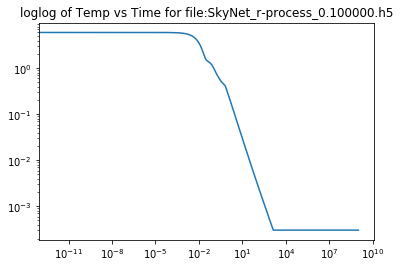

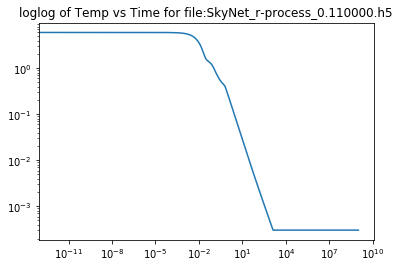

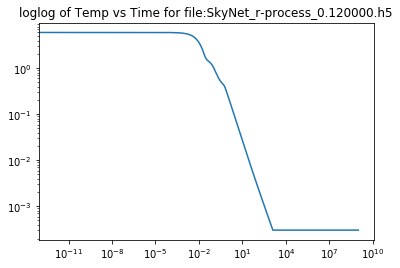

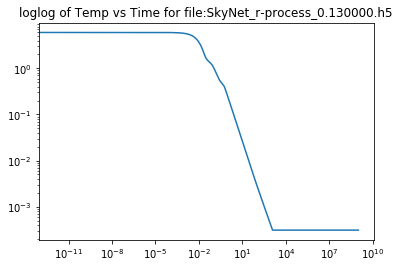

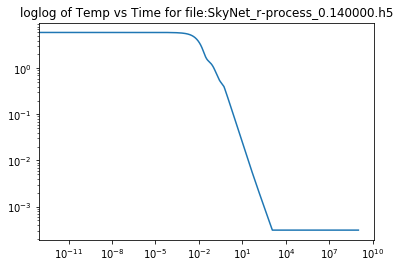

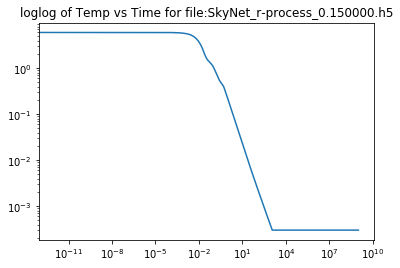

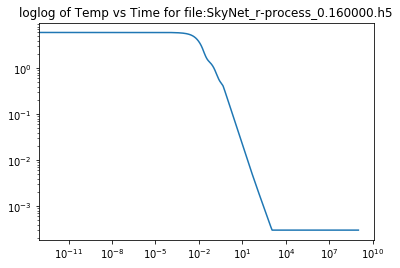

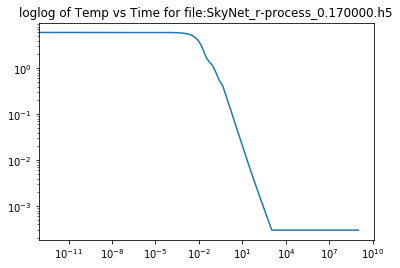

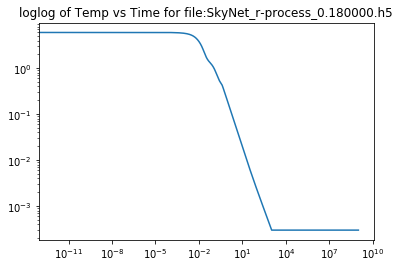

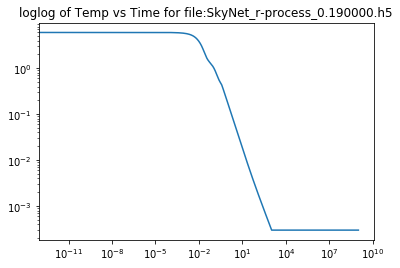

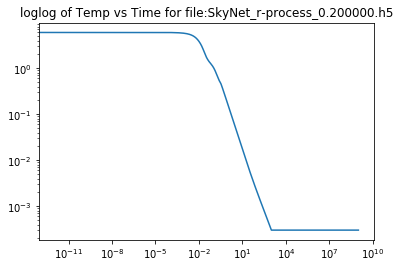

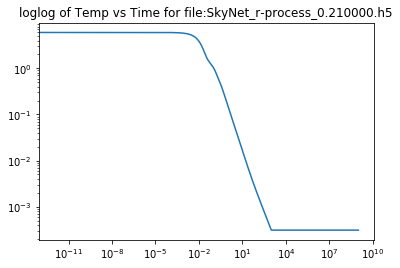

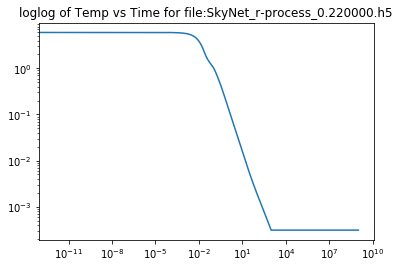

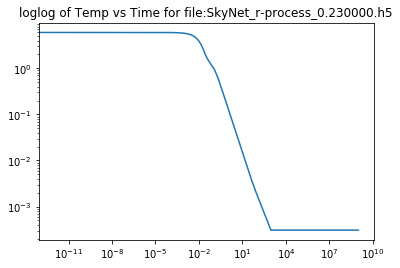

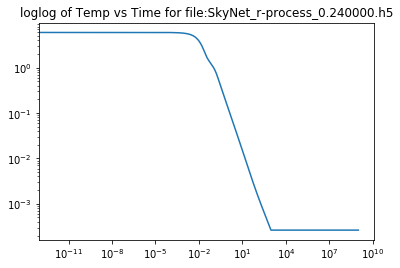

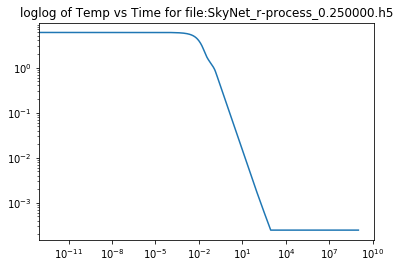

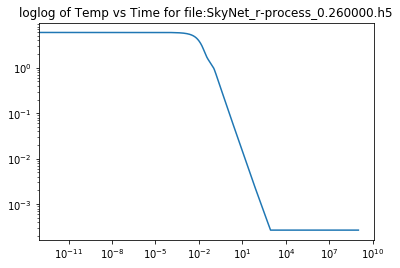

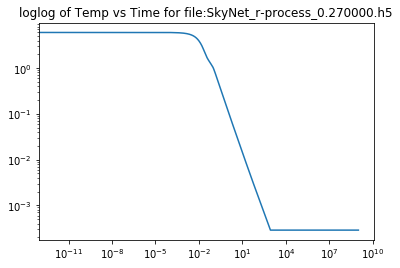

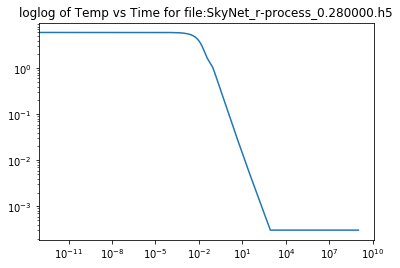

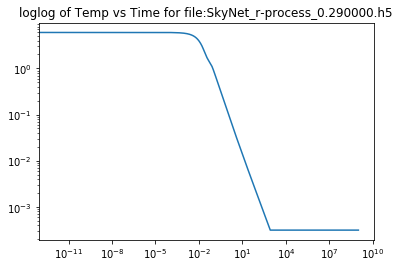

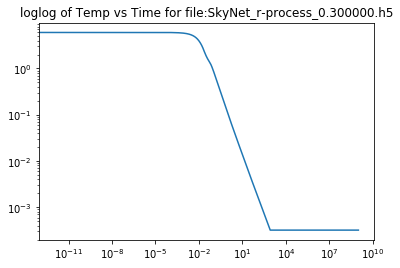

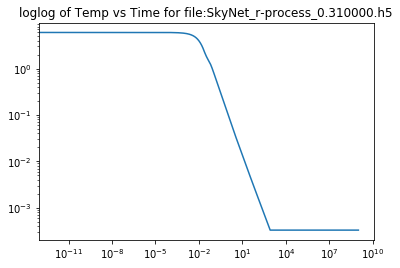

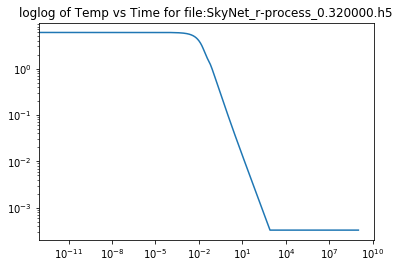

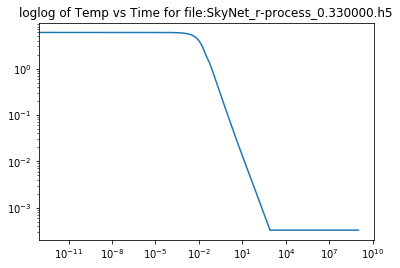

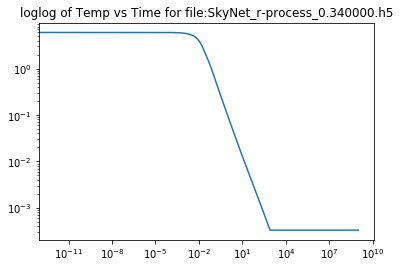

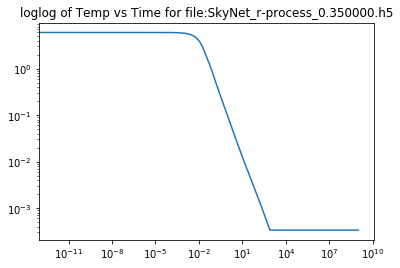

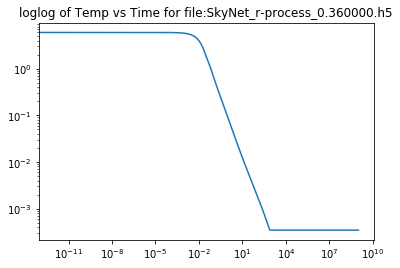

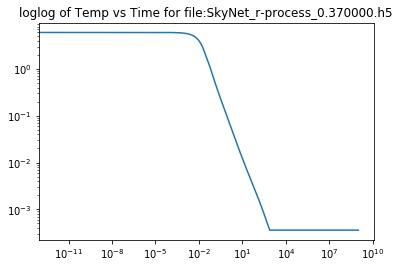

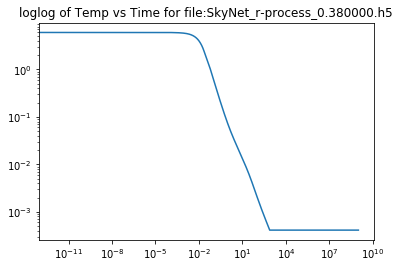

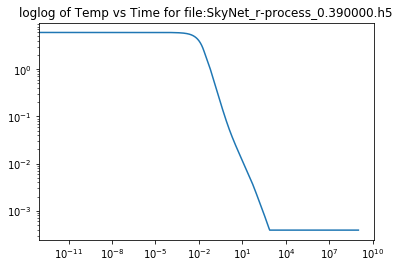

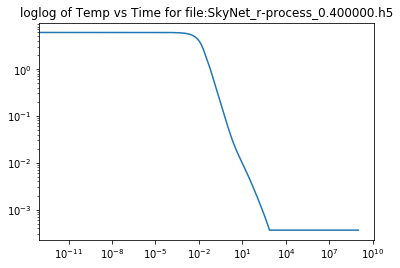

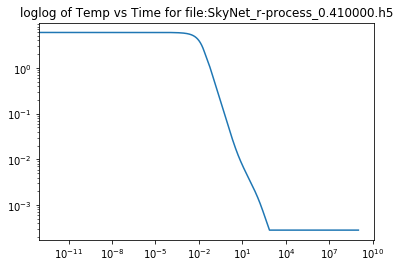

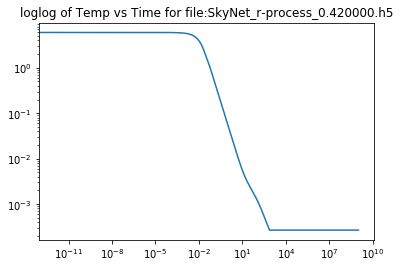

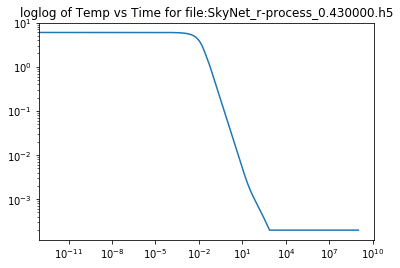

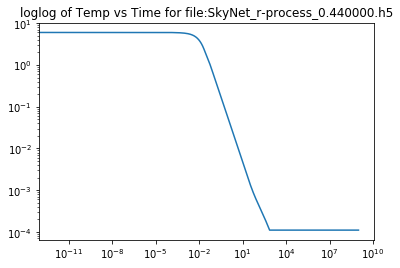

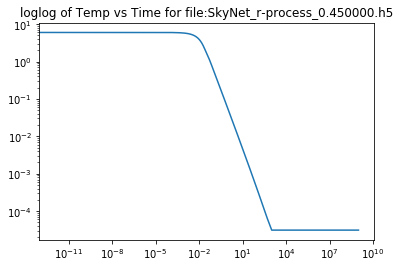

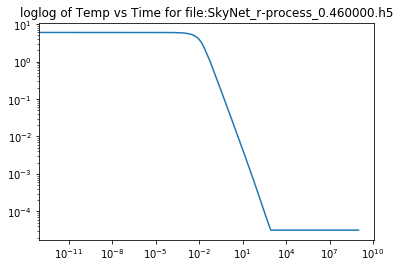

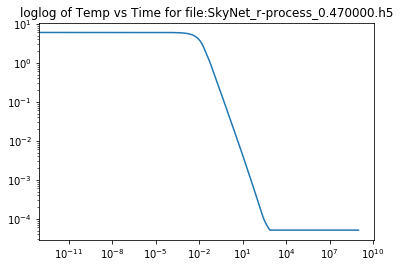

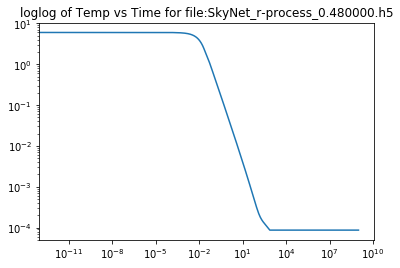

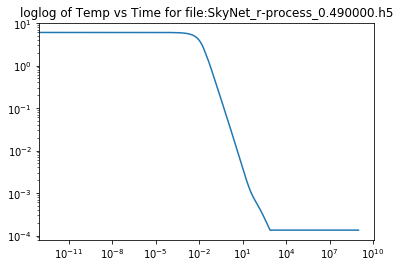

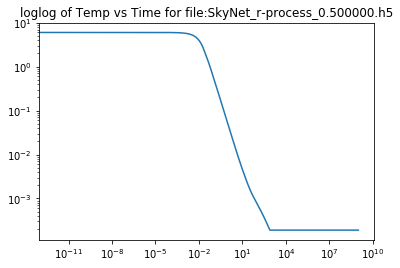

In [8]:
directory = './../Abundance_Calculations/Total Charge State Abundances/Skynet_Files'
for filename in os.listdir(directory):
    hf = h5py.File(directory + '/' + filename)
    temperature = hf["Temperature"]
    time = hf["Time"]
    plt.loglog(time,temperature)
    plt.title('loglog of Temp vs Time for file:' + filename)
    plt.show()

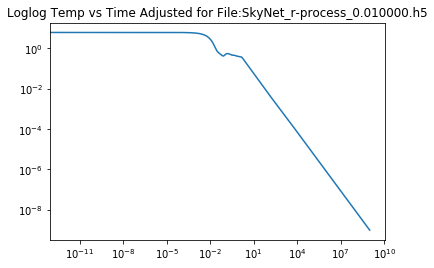

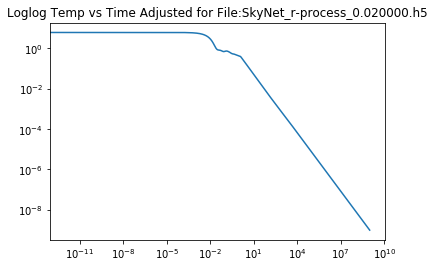

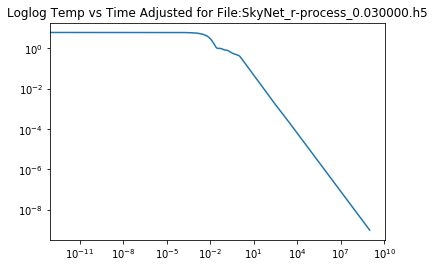

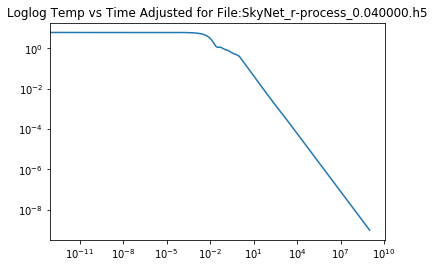

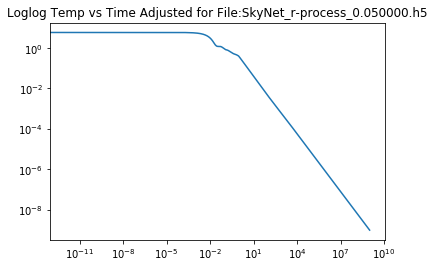

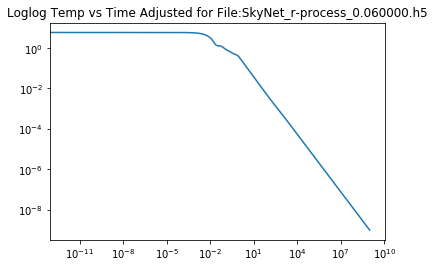

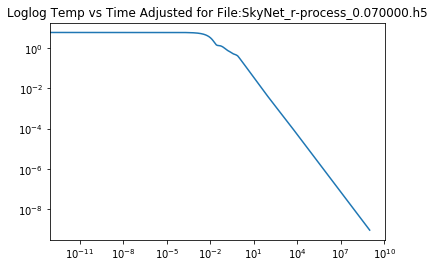

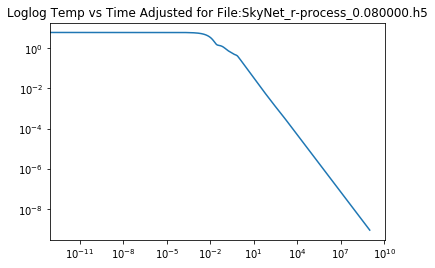

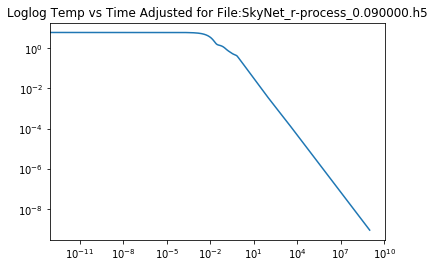

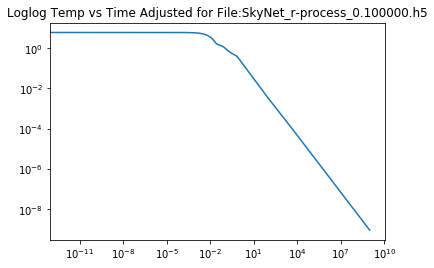

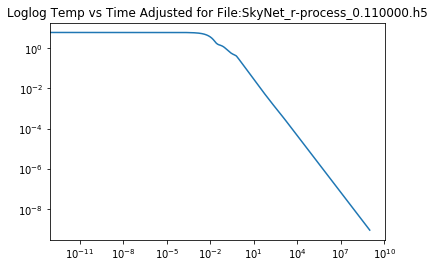

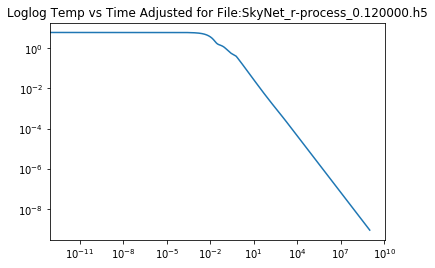

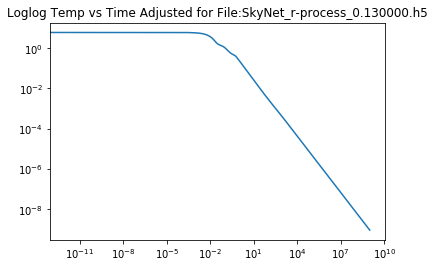

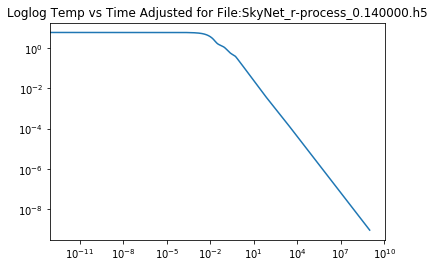

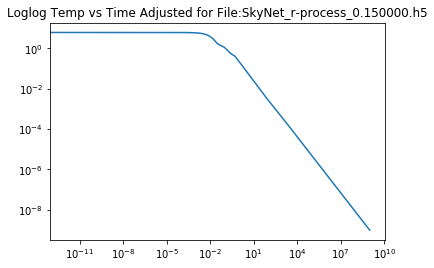

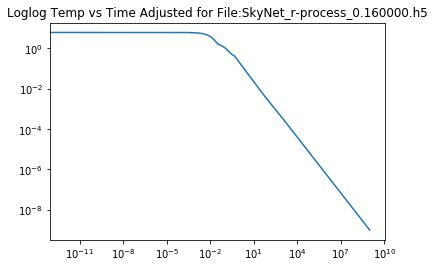

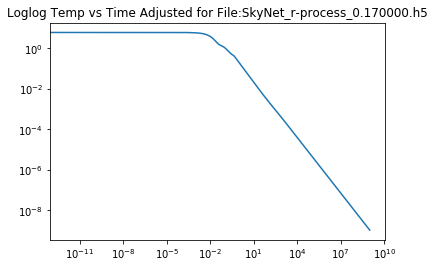

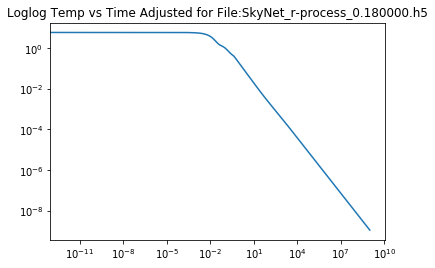

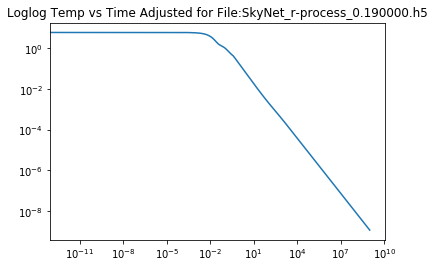

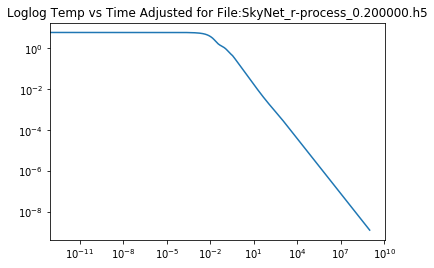

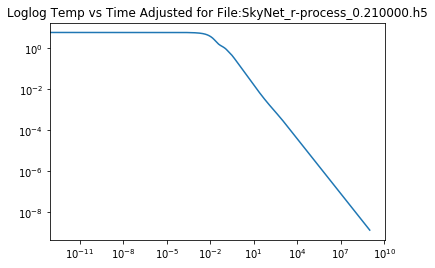

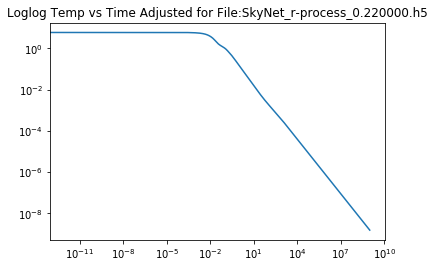

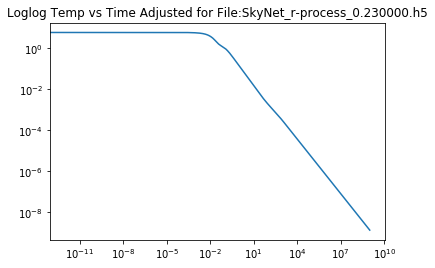

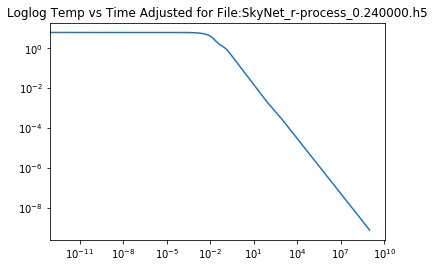

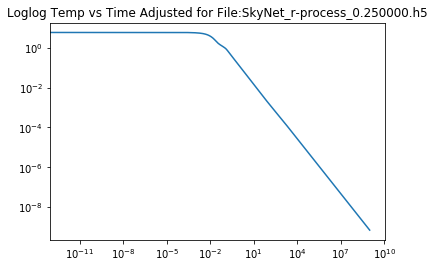

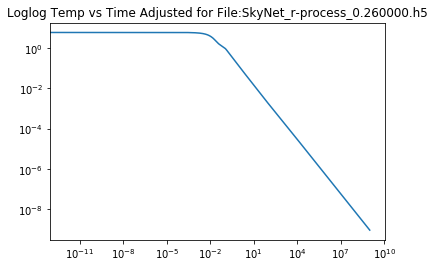

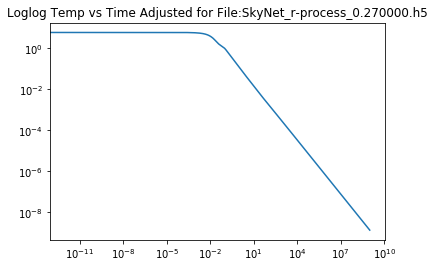

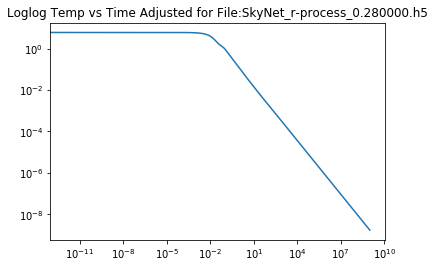

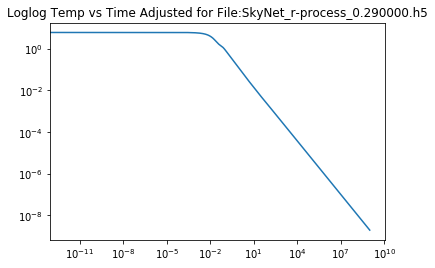

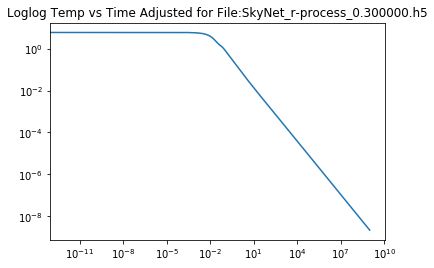

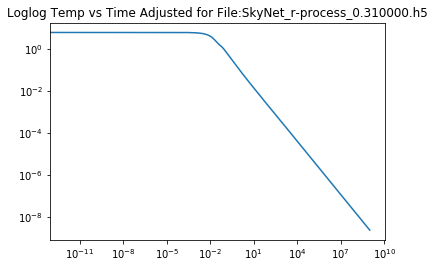

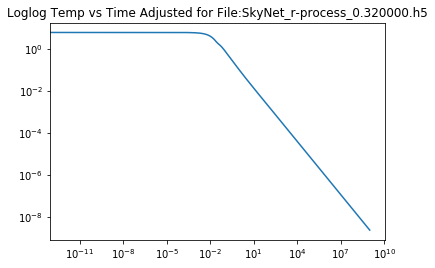

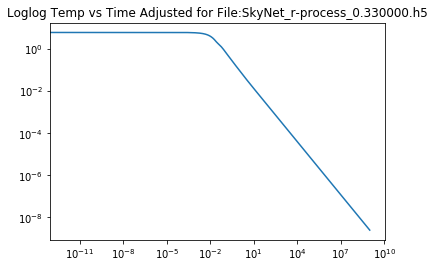

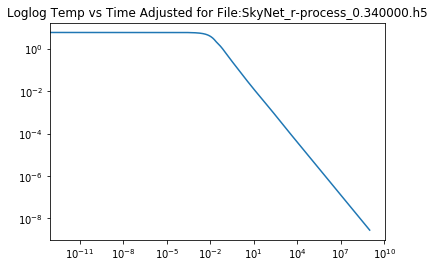

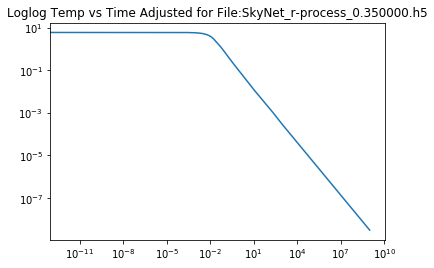

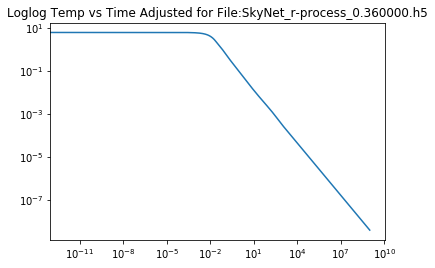

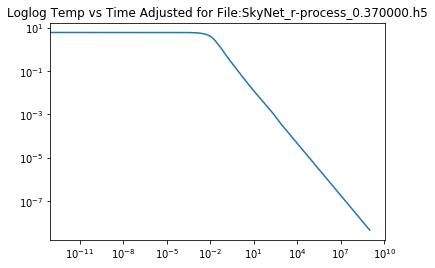

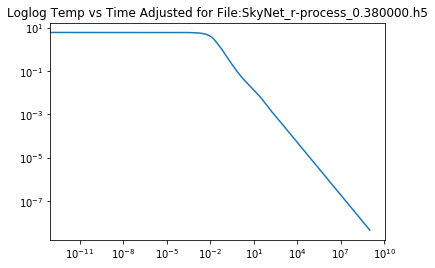

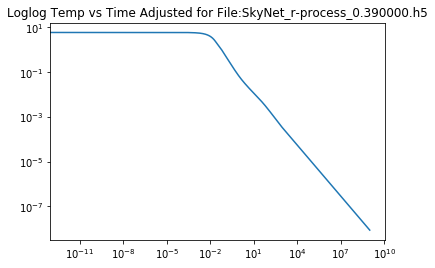

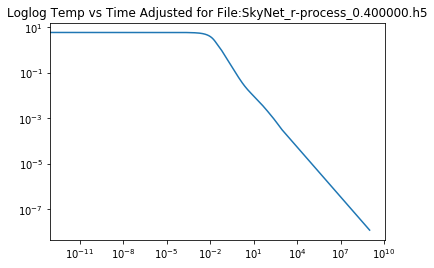

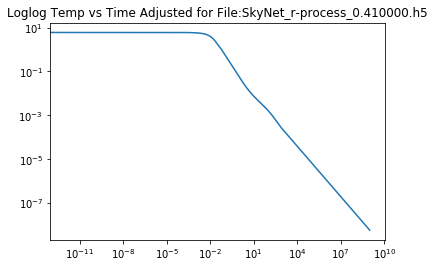

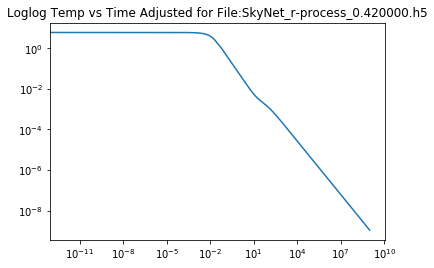

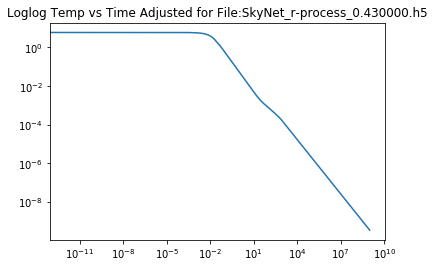

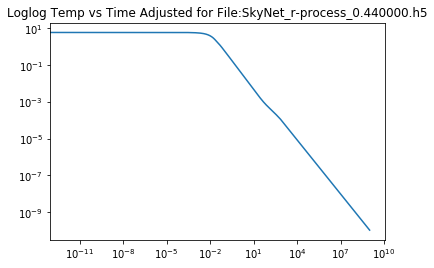

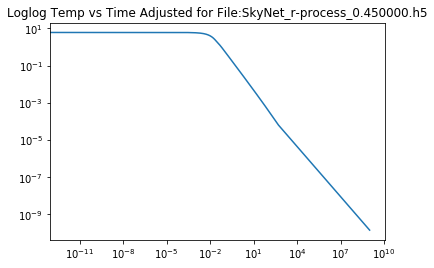

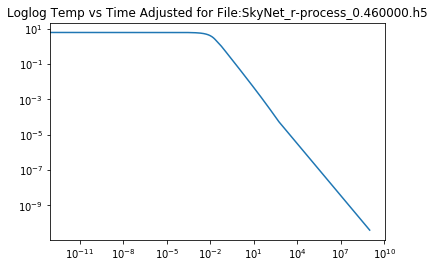

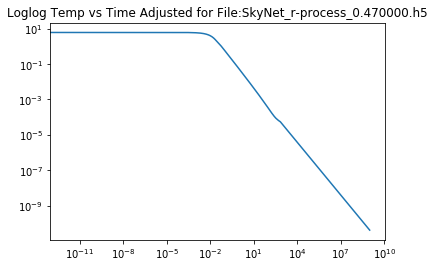

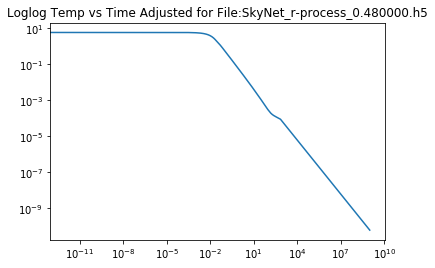

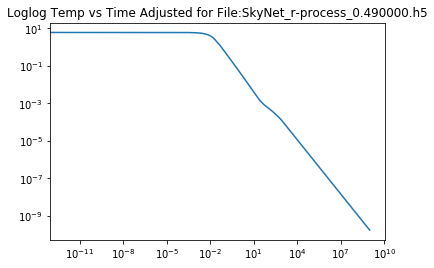

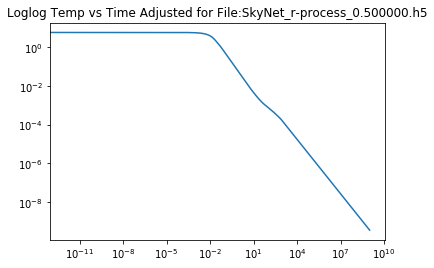

In [5]:
directory = './../Abundance_Calculations/Total Charge State Abundances/Skynet_Files'
for filename in os.listdir(directory):
    hf = h5py.File(directory + '/' + filename)

    temperature = hf["Temperature"]
    time = hf["Time"]
    mod_temp = []
    full_temp = []

    for i in range(1,len(temperature)):
        if temperature[i-1] / temperature[i] ==1:
            index_cut = i-1
            break

    linear = np.polyfit(np.log10(np.array(time[index_cut-300:index_cut])),np.log10(np.array(temperature[index_cut-300:index_cut])),1)
    m = linear[0]

    #m = (np.log10(temperature[1700]) - np.log10(temperature[1600])) / (np.log10(time[1700]) - np.log10(time[1600]))

    for i in range(0,len(temperature)):
        if i < index_cut:
            mod_temp.append(np.log10(temperature[i]))
            full_temp.append(temperature[i])
        else:
            del_t = m*(np.log10(time[i]) - np.log10(time[i-1]))
            mod_temp.append(mod_temp[i-1]+del_t)
            full_temp.append(10**mod_temp[i])

    plt.loglog(time,full_temp)
    plt.title('Loglog Temp vs Time Adjusted for File:' + filename)
    plt.show()

In [6]:
directory = './../Abundance_Calculations/Total Charge State Abundances/Skynet_Files'
for filename in os.listdir(directory):
    hf = h5py.File(directory + '/' + filename)
    print(len(hf['Temperature']))

2198
2243
2298
2287
2354
2354
2274
2246
2225
2223
2217
2185
2186
2184
2179
2179
2175
2231
2231
2257
2183
2043
2011
2111
2205
2224
2171
2167
2161
2138
2080
2025
1965
1902
1852
1774
1638
1529
1236
1131
998
992
851
696
463
494
570
666
905
1091
